In [59]:
import cv2 as cv
from pathlib import Path
from PIL import Image
import os
import numpy as np
import re

In [3]:
PNG_SOURCE_DIR = Path('/home/macosta/ttmp/primus-data/cropped/cropped-png/')

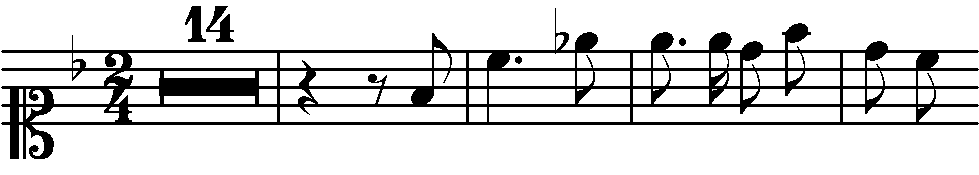

In [4]:
file = os.listdir(PNG_SOURCE_DIR)[4]
img = cv.imread(str(PNG_SOURCE_DIR / file), 0)
img_copy = img.copy()
Image.fromarray(img).show()

In [368]:
img = cv.imread(str(PNG_SOURCE_DIR / os.listdir(PNG_SOURCE_DIR)[0]), 0)
Image.fromarray(img[85:110, 175:200]).show()
Image.fromarray(img[40:65, 265:290]).show()
Image.fromarray(img[70:105, 130:155]).show()

In [243]:
img = cv.imread(str(PNG_SOURCE_DIR / os.listdir(PNG_SOURCE_DIR)[1]), 0)
Image.fromarray(img[70:85, 185:200]).show()
Image.fromarray(img[45:130, 500:512]).show()

In [313]:
img = cv.imread(str(PNG_SOURCE_DIR / os.listdir(PNG_SOURCE_DIR)[6]), 0)
Image.fromarray(img[70:88, 160:190]).show()
Image.fromarray(img[40:60, 560:590]).show()
Image.fromarray(img[50:70, 650:675]).show()
Image.fromarray(img[40:60, 520:545]).show()

In [404]:
img = cv.imread(str(PNG_SOURCE_DIR / os.listdir(PNG_SOURCE_DIR)[4]), 0)
Image.fromarray(img[60:120, 295:315]).show()

In [5]:
img = cv.imread(str(PNG_SOURCE_DIR / os.listdir(PNG_SOURCE_DIR)[0]), 0)
filled_space = img[85:110, 175:200]
filled_line = img[40:65, 265:290]
eighth_rest = img[70:105, 130:155]
img = cv.imread(str(PNG_SOURCE_DIR / os.listdir(PNG_SOURCE_DIR)[1]), 0)
dot = img[70:85, 185:200]
barline = img[45:130, 500:512]
img = cv.imread(str(PNG_SOURCE_DIR / os.listdir(PNG_SOURCE_DIR)[6]), 0)
whole_space = img[70:88, 160:190]
whole_line = img[40:60, 560:590]
half_space = img[50:70, 650:675]
half_line = img[40:60, 520:545]
img = cv.imread(str(PNG_SOURCE_DIR / os.listdir(PNG_SOURCE_DIR)[4]), 0)
quarter_rest = img[60:120, 295:315]

In [27]:
templates_thresholds = [
    (filled_space, 0.65), 
    (filled_line, 0.65), 
    (eighth_rest, 0.7),
    (quarter_rest, 0.7), 
    (dot, 0.7), 
    (barline, 0.95), 
    (whole_space, 0.7), 
    (whole_line, 0.7), 
    (half_space, 0.7),
    (half_line, 0.7)
]

can_have_beams = [0, 1]

In [99]:
def erode_image(img):
    kernel = np.zeros((5,5),np.uint8)
    for i in range(5):
        kernel[i, 2] = 1
    eroded = cv.dilate(img, kernel, iterations=1)
    return eroded

def stem_faces_up(img, top_left_notehead, bottom_right_notehead):
    tln = top_left_notehead
    brn = bottom_right_notehead
    bounding_box = img[tln[1]-10:brn[1]+10, tln[0]:brn[0]]
    top = 0 in bounding_box[0]
    bottom = 0 in bounding_box[-1]
    if top and not bottom:
        return True, True
    elif bottom and not top:
        return False, True
    else:
        return True, False

def count_beams(img, top_left_notehead, bottom_right_notehead):
    tln = top_left_notehead
    brn = bottom_right_notehead
    eroded = erode_image(img)
    faces_up, unambiguous = stem_faces_up(eroded, tln, brn)
#     print(f"Faces up: {faces_up} Unambiguous: {unambiguous}")
    if faces_up:
        trn = (brn[0], tln[1])
        bounding_box = eroded[max(trn[1] - 100, 0):trn[1], trn[0]-5:trn[0]+10]
        Image.fromarray(bounding_box).show()
    else:
        bln = (tln[0], brn[1])
        bounding_box = eroded[bln[1]:min(bln[1] + 100, len(eroded)), bln[0]-5:bln[0]+10]
        Image.fromarray(bounding_box).show()
    left_side = bounding_box[:, 0]
    right_side = bounding_box[:, -1]
    left_side = ''.join([str(x//255) for x in left_side])
    left_side = re.sub('0+', 'x', left_side)
    left_side = re.sub('1+', '', left_side)
    right_side = ''.join([str(x//255) for x in right_side])
    right_side = re.sub('0+', 'x', right_side)
    right_side = re.sub('1+', '', right_side)
#     print(len(left_side), len(right_side))
    return len(left_side), len(right_side)

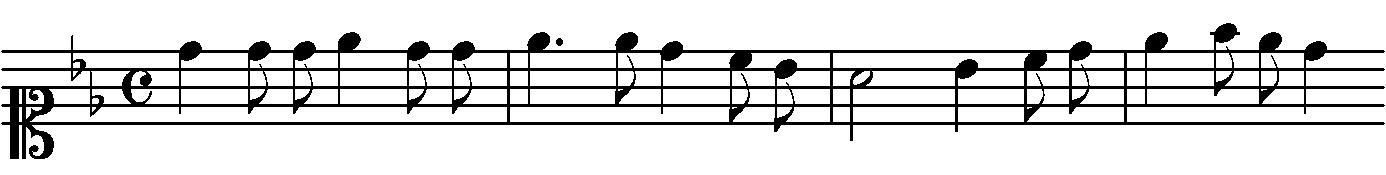

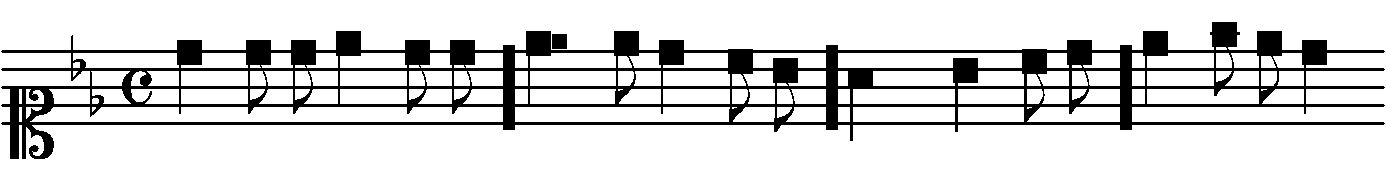

In [100]:
i = 11
img = cv.imread(str(PNG_SOURCE_DIR / os.listdir(PNG_SOURCE_DIR)[i]), 0)
img_copy = img.copy()
Image.fromarray(img).show()
locations = []
for i, (template, threshold) in enumerate(templates_thresholds):
    res = cv.matchTemplate(img,template,cv.TM_CCOEFF_NORMED)
    while np.max(res) > threshold:
        _, _, _, top_left = cv.minMaxLoc(res)
        bottom_right = (top_left[0] + template.shape[1], top_left[1] + template.shape[0])
        if i in can_have_beams:
            left_beams, right_beams = count_beams(img, top_left, bottom_right)
#             print(left_beams, right_beams)
        locations.append((top_left, bottom_right))
        # Fill in region to prevent being matched again
        img[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]] = 0
#         if i in can_have_beams:
#             Image.fromarray(img).show()
        
        res = cv.matchTemplate(img, template, cv.TM_CCOEFF_NORMED)
Image.fromarray(img).show()

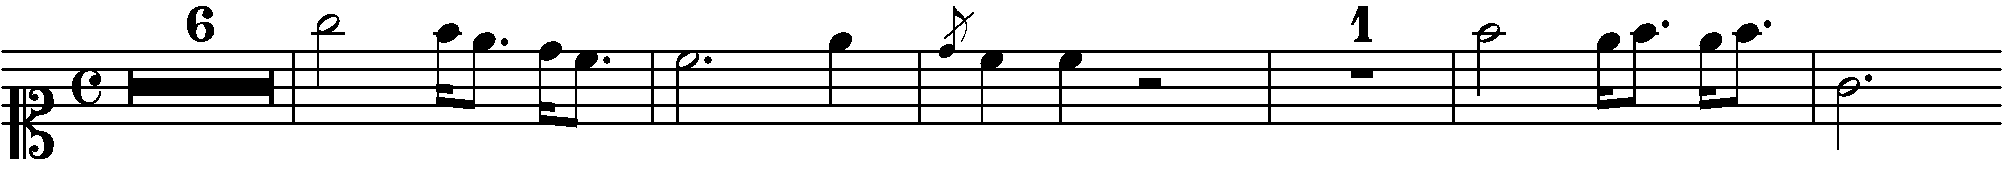

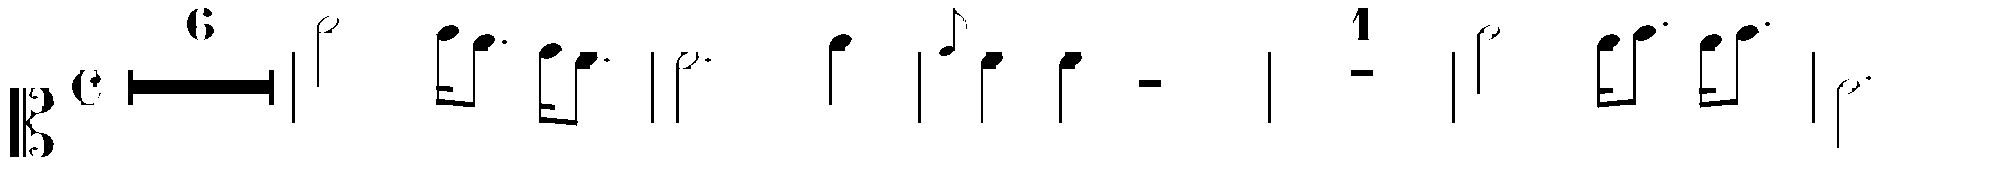

In [22]:
img = cv.imread(str(PNG_SOURCE_DIR / os.listdir(PNG_SOURCE_DIR)[13]), 0)
Image.fromarray(img).show()
kernel = np.zeros((5,5),np.uint8)
for i in range(5):
    kernel[i, 2] = 1
erosion = cv.dilate(img,kernel,iterations = 1)
Image.fromarray(erosion).show()